```markdown
# Analysis of Adult.csv Dataset

## Description
This notebook provides an in-depth analysis of the Adult Income dataset. The dataset contains demographic information and income details of individuals. The goal is to explore the data, clean it, and perform visualizations to derive meaningful insights. The analysis includes data cleaning, one-hot encoding, and visualizations to understand relationships between various features and income levels.

## Table of Contents
1. [Introduction](#introduction)
2. [Data Cleaning](#data-cleaning)
3. [One-Hot Encoding](#one-hot-encoding)
4. [Data Visualization](#data-visualization)
    - Distribution Analysis
    - KDE Analysis
    - Pairwise Relationships
5. [Conclusions](#conclusions)

```

In [2]:
#unzip a zip file
import zipfile
import os

with zipfile.ZipFile('dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_files')


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

```markdown
## Data Cleaning
This section involves cleaning the dataset by handling missing values, removing duplicates, and addressing ambiguous entries to ensure data quality.
```

In [4]:
df = pd.read_csv('extracted_files/adult.csv')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


```markdown
There are 14 columns in this dataset, as displayed above. Lets see a few sample rows to understand the data better. Next lets see how many NULLs are present, and also check the presence of duplicates
```

In [5]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [6]:

print("Null values in each column:")
print(df.isnull().sum())

print("\n\nDuplicated rows:")
# Get all indexes of duplicated rows
index_of_duplicates = df[df.duplicated()].index
print(index_of_duplicates)

Null values in each column:
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


Duplicated rows:
Index([ 8453,  8645, 12202, 14346, 15603, 17344, 19067, 20388, 20507, 22783,
       22934, 23276, 23660, 23720, 23827, 26738, 27133, 28796, 29051, 29334,
       29604, 31060, 32065, 32419],
      dtype='int64')


``` markdown
The number of null values turns out to be 0, but it seems that there are many '?' for various categorical fields.
```


In [7]:
print("\nPercent of '?' amongst all values in each column:")
for col in df.columns:
    print(col, end='\t\t\t')
    no_of_uk = (df[col] == '?').sum()
    print(no_of_uk/(df[col].count()) ,'%')



Percent of '?' amongst all values in each column:
age			0.0 %
workclass			0.05638647461687295 %
fnlwgt			0.0 %
education			0.0 %
education.num			0.0 %
marital.status			0.0 %
occupation			0.056601455729246644 %
relationship			0.0 %
race			0.0 %
sex			0.0 %
capital.gain			0.0 %
capital.loss			0.0 %
hours.per.week			0.0 %
native.country			0.0179048555019809 %
income			0.0 %


```markdown
As there are very minimum % of ambiguity, we can remove those rows with '?'
```

In [8]:
#Remove all rows with '?' in each column
for col in df.columns:
    df.drop(df[df[col] == '?'].index, inplace=True)

# Remove duplicated rows
df.drop_duplicates(inplace=True)


#Lets verify that the data is clean now

#check number of duplicated rows and number of rows with '?'
print("\n\nDuplicated rows:")
index_of_duplicates = df[df.duplicated()].index
print(index_of_duplicates)

# Check number of rows with '?'
print("\n\nRows with '?':")
for col in df.columns:
    no_of_uk = (df[col] == '?').sum()
    print(col, ":", no_of_uk)




Duplicated rows:
Index([], dtype='int64')


Rows with '?':
age : 0
workclass : 0
fnlwgt : 0
education : 0
education.num : 0
marital.status : 0
occupation : 0
relationship : 0
race : 0
sex : 0
capital.gain : 0
capital.loss : 0
hours.per.week : 0
native.country : 0
income : 0


In [9]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


```markdown
## One-Hot Encoding 

One-hot encoding is a method used to convert categorical variables into a numerical format by creating binary columns for each category. For example, if the column `workclass` has categories `Private`, `Self-emp`, and `Gov`, one-hot encoding will create three new columns: `workclass_Private`, `workclass_Self-emp`, and `workclass_Gov`, with binary values (0 or 1) indicating the presence of each category in the original column.
```

In [10]:
#display number of categories in each column
print("\n\nNumber of categories in each column:")
for col in df.columns:
    print(col, ":", df[col].nunique())



Number of categories in each column:
age : 72
workclass : 7
fnlwgt : 20263
education : 16
education.num : 16
marital.status : 7
occupation : 14
relationship : 6
race : 5
sex : 2
capital.gain : 118
capital.loss : 90
hours.per.week : 94
native.country : 41
income : 2


```markdown
One-Hot Encoding can be used to identify the correlation between categorical columns with respect to other numerical columns (as seen in the heatmap later).

We can implement one-hot encoding for columns such as `workclass`, `marital.status`, `relationship`, `race`, `sex`, and `income` as the number of categories seems reasonable. Below, we try applying one-hot encoding to the `workclass` column. 

For columns with just two categories, such as `income` and `sex`, one-hot encoding can be ineffective as it introduces redundancy. Instead, these columns can be converted into a single boolean column to make them more efficient for analysis.
```

In [11]:
#one-hot encoding  for categorical variable 'workclass'. We will still retain the categorical column 'workclass' for further analysis, though its redundant
pd.get_dummies(df, columns=['workclass']) # Retain all categories for further analysis

#we see (on scrolling) the columns such as 'workclass_ Private', 'workclass_ Self-emp-not-inc' etc. are created of boolean type
#for below analysis, we will continue to use the original column 'workclass' and implement one-hot encoding only for the colour map. (As we might not really need the boolean columns for further analysis)

,age,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,...,hours.per.week,native.country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
1,82,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,...,18,United-States,<=50K,False,False,True,False,False,False,False
3,54,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,...,40,United-States,<=50K,False,False,True,False,False,False,False
4,41,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,...,40,United-States,<=50K,False,False,True,False,False,False,False
5,34,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,...,45,United-States,<=50K,False,False,True,False,False,False,False
6,38,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,...,40,United-States,<=50K,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,...,40,United-States,<=50K,False,False,True,False,False,False,False
32557,27,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,...,38,United-States,<=50K,False,False,True,False,False,False,False
32558,40,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,...,40,United-States,>50K,False,False,True,False,False,False,False
32559,58,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,...,40,United-States,<=50K,False,False,True,False,False,False,False


```markdown
Right now, we are not deleting any columns yet, as we dont know the direct correlation yet. if we know the relation between columns such as education, and education.num, we can eliminate one of them (preferrable education)
```

```markdown
# Data Visualization and analysis

This section includes various visualizations to understand the relationships and distributions of numerical and categorical columns in the dataset.
```



Dataframe of numerical-only columns:
Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')


Dataframe of bool-only columns:
Index([], dtype='object')


Dataframe of categorical-only columns:
Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')


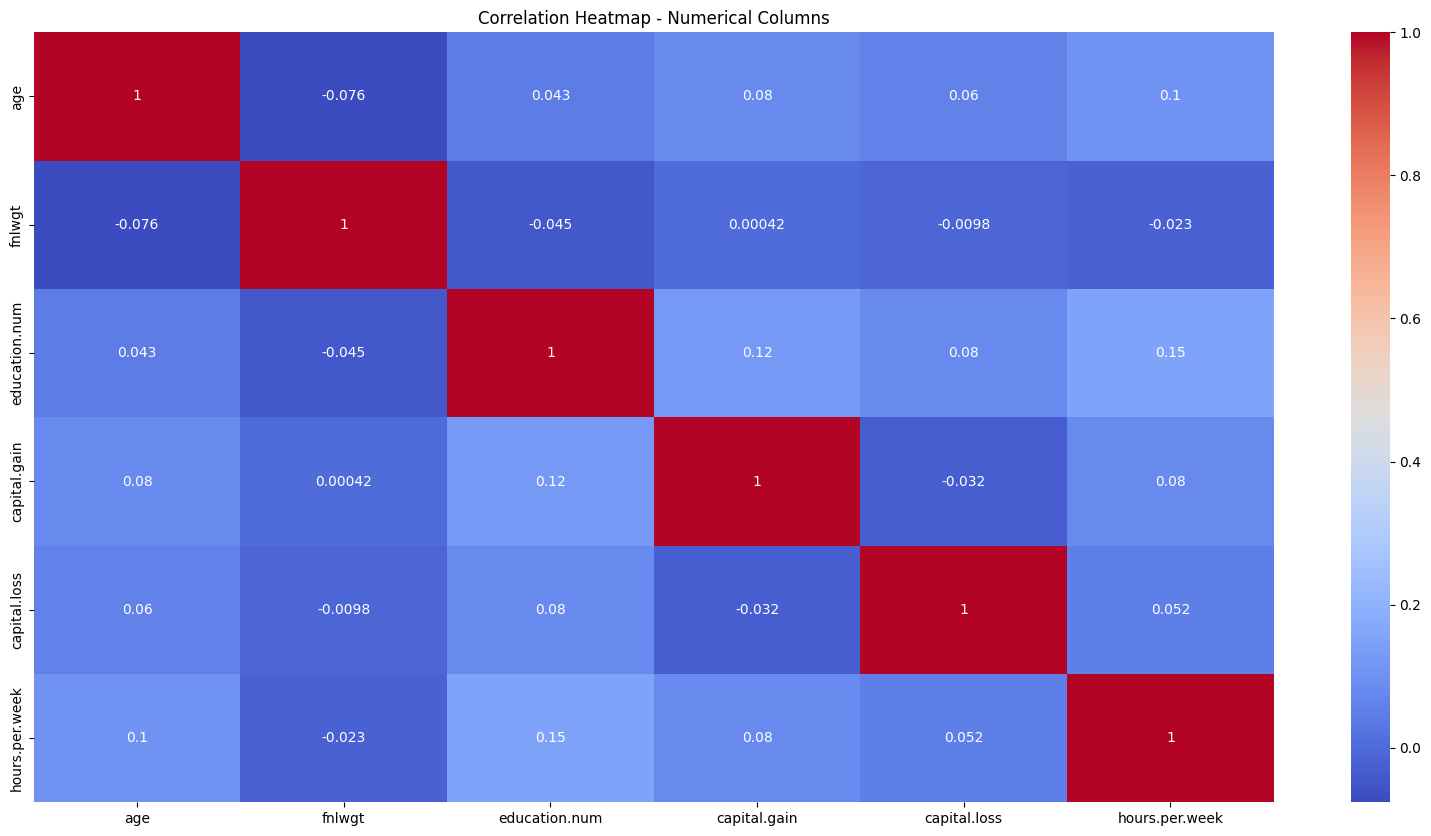

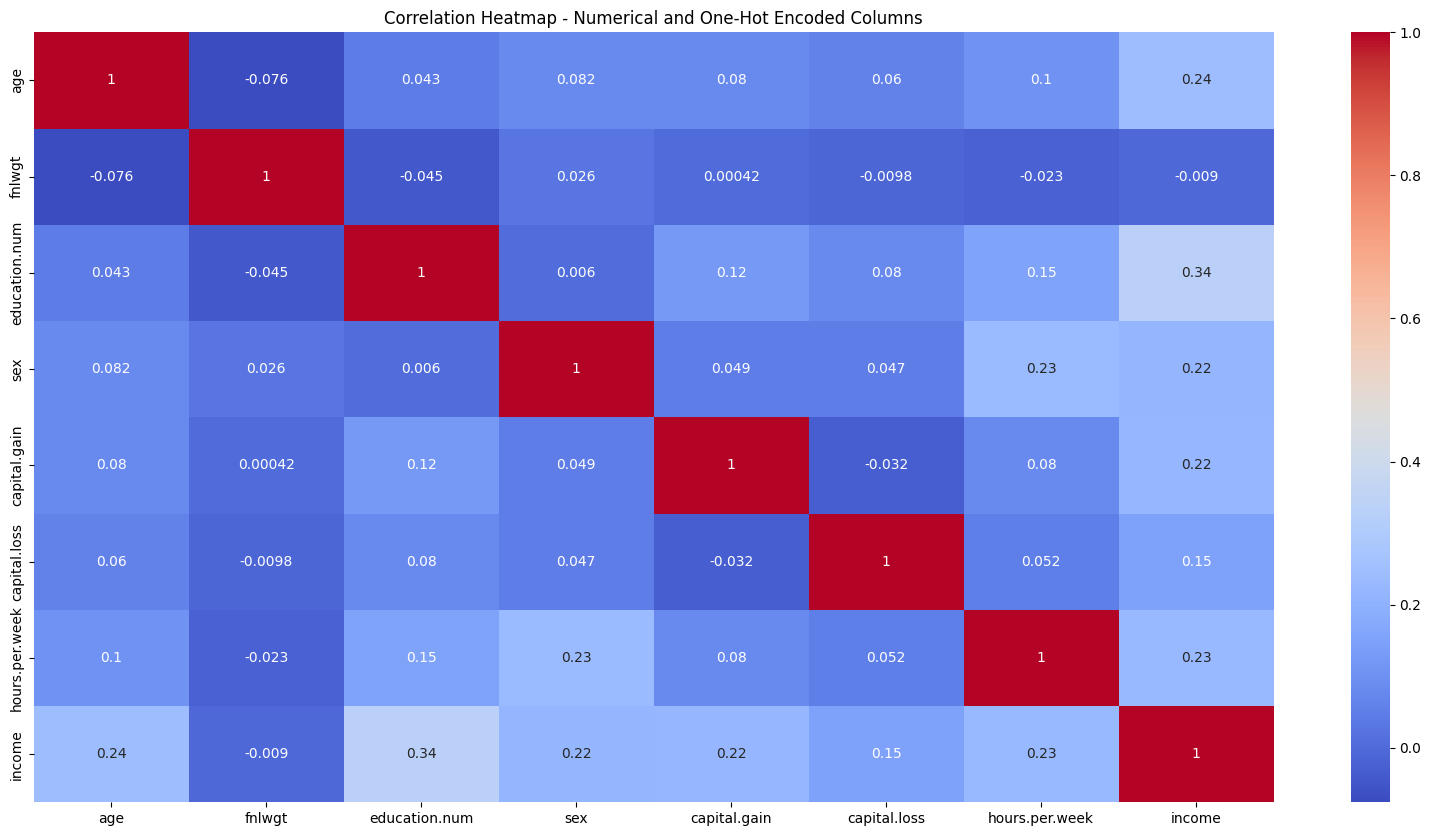

In [12]:
#dataframe of numerical-only columns
print("\n\nDataframe of numerical-only columns:")
print(df.select_dtypes(include=[np.number]).columns)

#dataframe of bool-only columns
print("\n\nDataframe of bool-only columns:")
print(df.select_dtypes(include=[bool]).columns)

#dataframe of categorical-only columns
print("\n\nDataframe of categorical-only columns:")
print(df.select_dtypes(exclude=[np.number, bool]).columns)

#Heat map of correlation between numerical columns
plt.figure(figsize=(20, 10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Numerical Columns')
plt.show()

#Heat map of correlation between numerical columns along with one-hot encoded boolean columns
plt.figure(figsize=(20, 10))
#Replace 'workclass' with one-hot encoded columns for it. for income and sex, we will use boolean columns
df_ohe = pd.get_dummies(df, columns=['workclass'])
df_ohe['sex'] = df_ohe['sex'].map({'Male': 1, 'Female': 0})
df_ohe['income'] = df_ohe['income'].map({'>50K': 1, '<=50K': 0})
sns.heatmap(df_ohe.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Numerical and One-Hot Encoded Columns')
plt.show()



*Based on the heat-map, a few inferences as below can be made:*

*- A person with higher age, seems to have a higher probability of income > 50K*  
*- A person with lower age seems to prefer private jobs over self-employed. Choice of Government Jobs seem uninfluenced by age*  
*- A person who has better education is paid well (income >50K) and seems to prefer non-private jobs. They seem to work for more hours than others*  
*- More Males seem to work for more hours than Female. Males seem to be paid better than females.*

*Based on the data and inferences from the heat-map, it might make sense to look at the relations of the following columns*

*income - education.no* <br>
*income - age* <br>
*income - sex* <br>
*workclass - income* <br>
*workclass - eduucation.no* <br>
*workclass - age* <br>
*worclass - sex* <br>

*Before that, lets look at the individual distribution of the graphs to get a better idea about the trends*

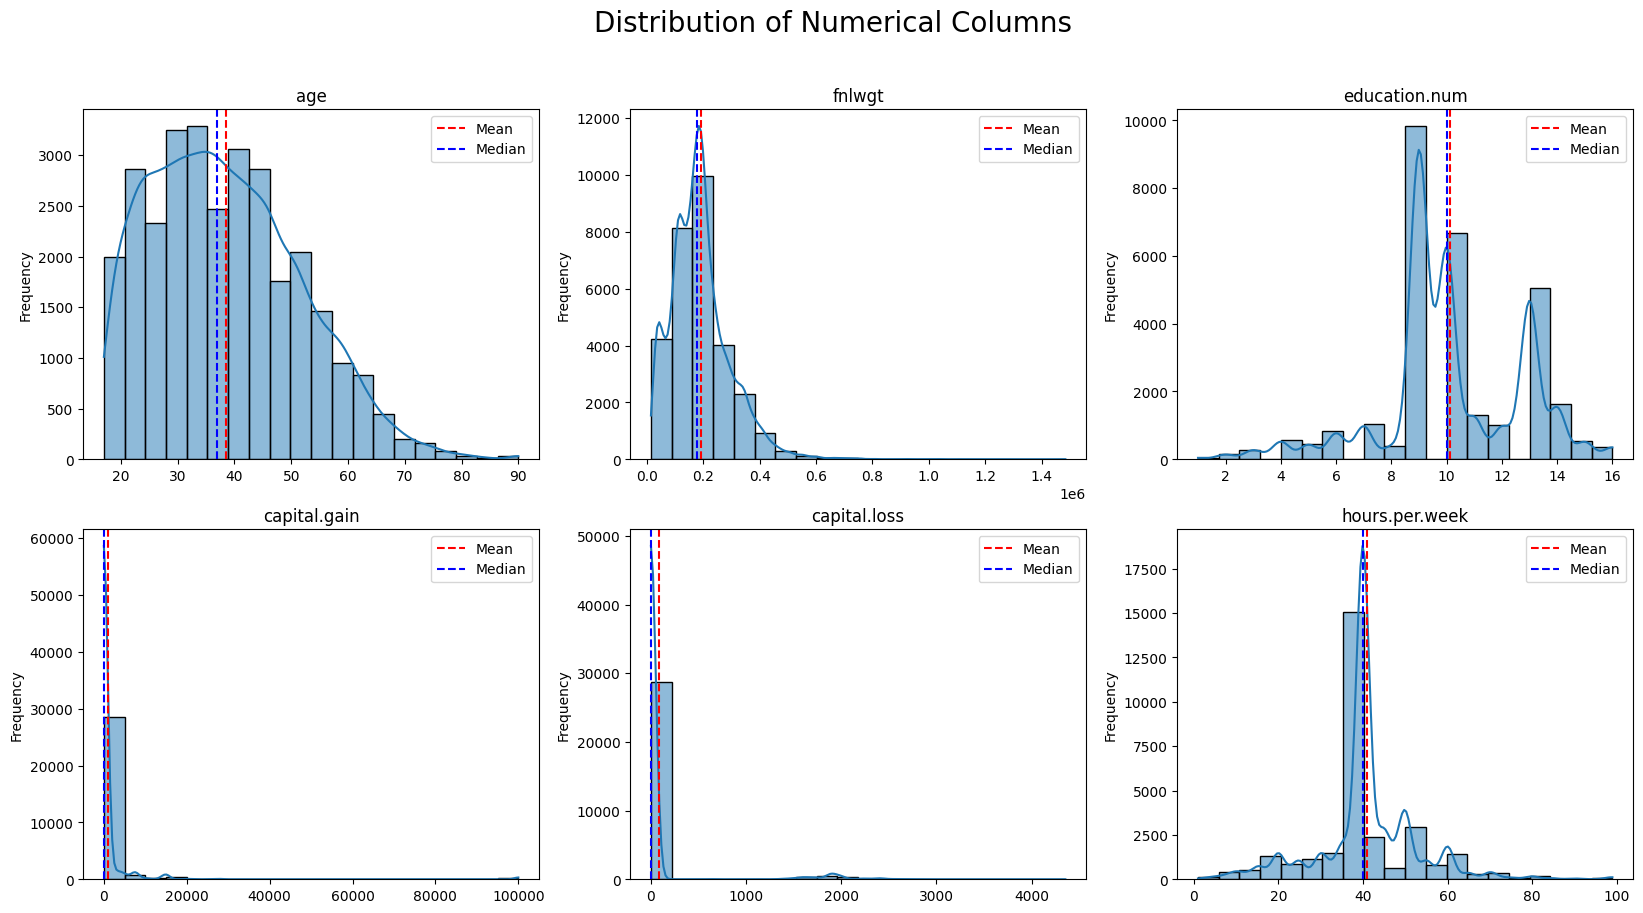

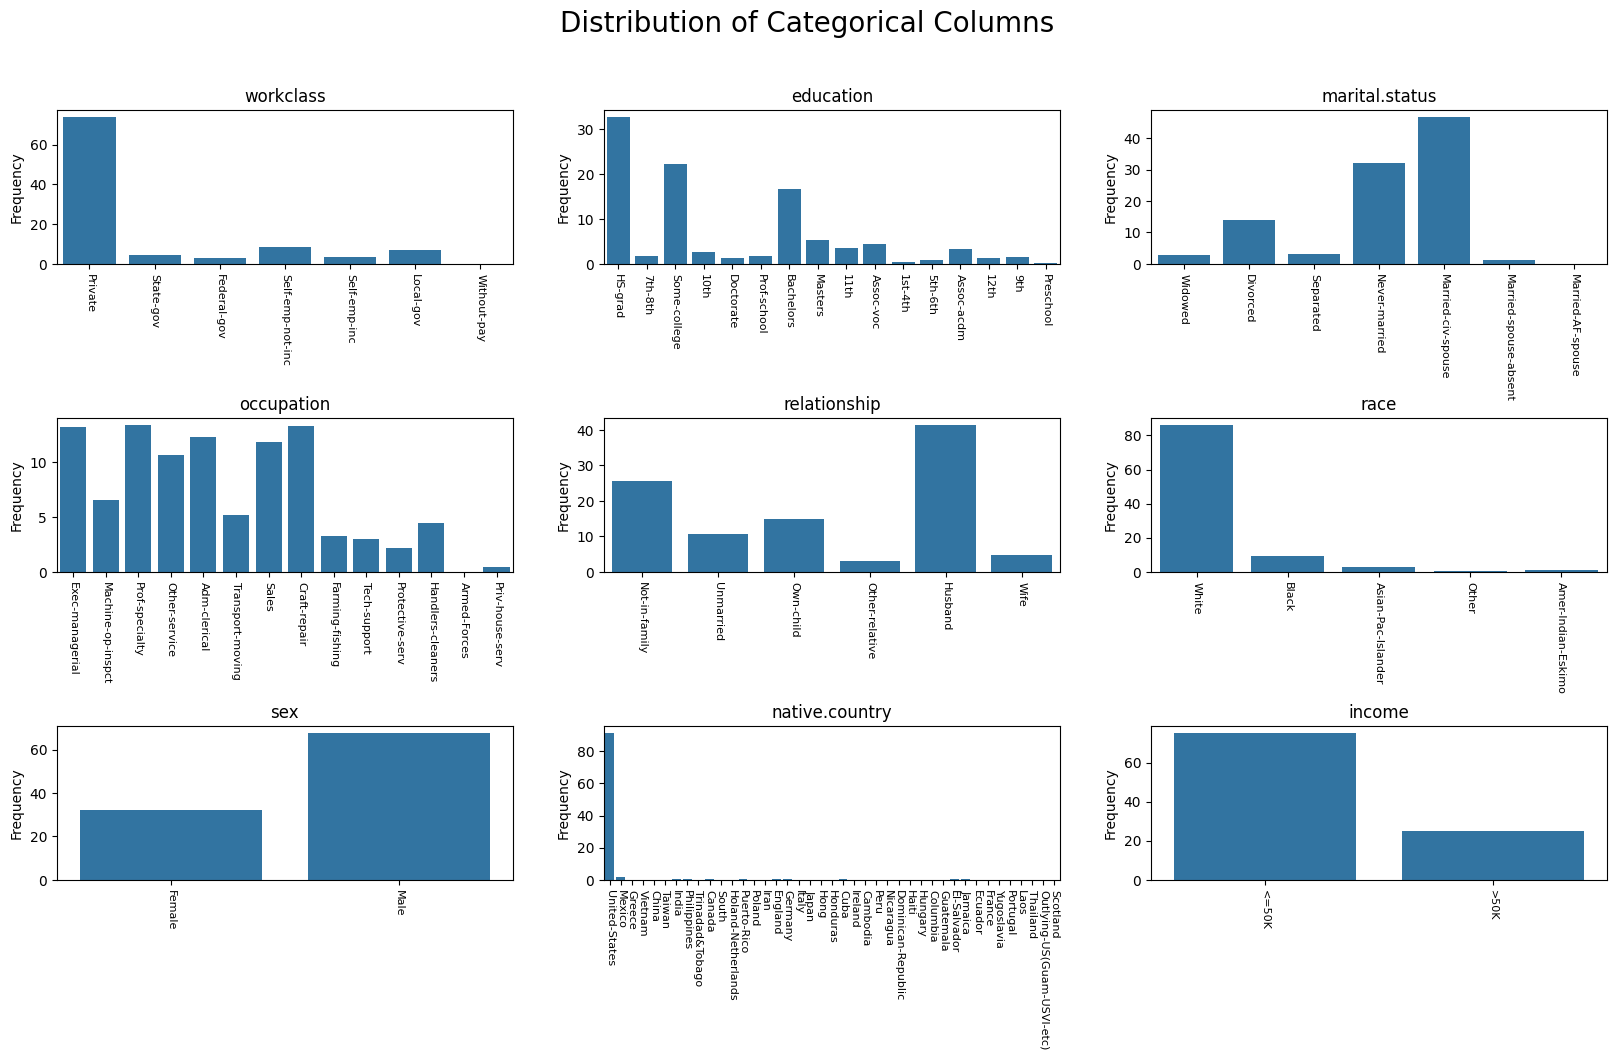

In [13]:

#create layout of 2x3 for 6 plots
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle('Distribution of Numerical Columns', fontsize=20)
#plot distribution of each numerical column 
numerical_columns = [col for col in df.select_dtypes(include=[np.number]).columns]
for i, col in enumerate(numerical_columns):
    ax = axs[i // 3, i % 3]
    sns.histplot(df[col], bins=20, kde=True, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')
    mean = df[col].mean()
    median = df[col].median()   
    ax.axvline(mean, color='r', linestyle='--', label='Mean')
    ax.axvline(median, color='b', linestyle='--', label='Median')
    ax.legend()
plt.show()


#plot distribution of categorical columns 
fig, axs = plt.subplots(3, 3, figsize=(20, 10))
fig.suptitle('Distribution of Categorical Columns', fontsize=20)
#plot distribution of each categorical column
categorical_columns = df.select_dtypes(exclude=[np.number, bool]).columns
plt.subplots_adjust(hspace=1)
for i, col in enumerate(categorical_columns):
    ax = axs[i // 3, i % 3]
    sns.countplot(x=col, data=df, ax=ax,stat='percent')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')
    ax.xaxis.set_tick_params(rotation=270, labelsize=8)
plt.show()


*Clearly, the dataset has the observations :*
- *Mean Age seems to be 40*
- *Majority people are at education level 8-10 (HS-Grad)*
- *Majority of the people (~80%) belong to United States*
- *70% and more are male*
- *Majority are in Private Jobs*
- *70% and more have income <= 50,000*
- *80% of people are White*
- *The Occupation seems to be well-distributed*   
- *Around 40% are married while about 30% seem to be unmarried*

*The column fnlwgt seems ambiguous but majority have its value to be 2x10^6*  
*While relationship seems ambiguous, majority are husbands*

*The above are few observations which might cause biased data in the applications we might build using this data. It explains the distribution of the people from whom the data was collected.*

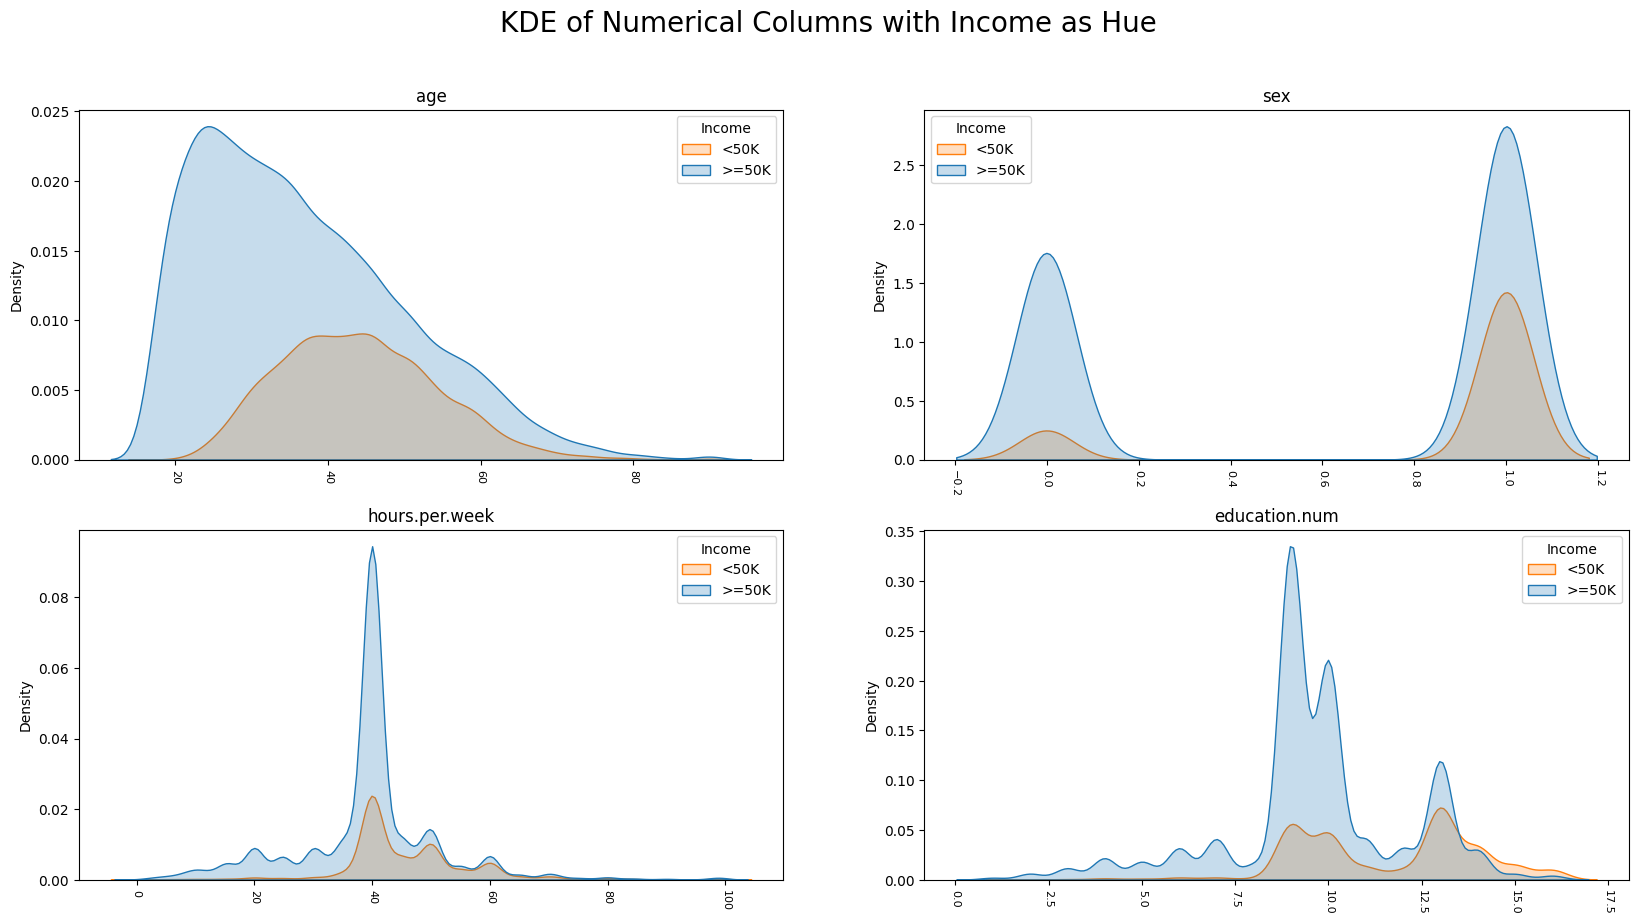

In [14]:
#Plot KDE of numerical columns with income as hue
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('KDE of Numerical Columns with Income as Hue', fontsize=20)
columns_to_plot = ['age', 'sex', 'hours.per.week', 'education.num']
for i, col in enumerate(columns_to_plot):
    ax = axs[i // 2, i % 2]
    sns.kdeplot(data=df_ohe, x=col, hue='income', ax=ax, fill=True)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Density')
    ax.xaxis.set_tick_params(rotation=270, labelsize=8)
    ax.legend(title='Income', labels=['<50K', '>=50K'])
plt.show()

*Clearly people who are younger, with higher education level (7.5+), those who work for about 40 hours a week and those who are males turn out to earn more as compared to others.*

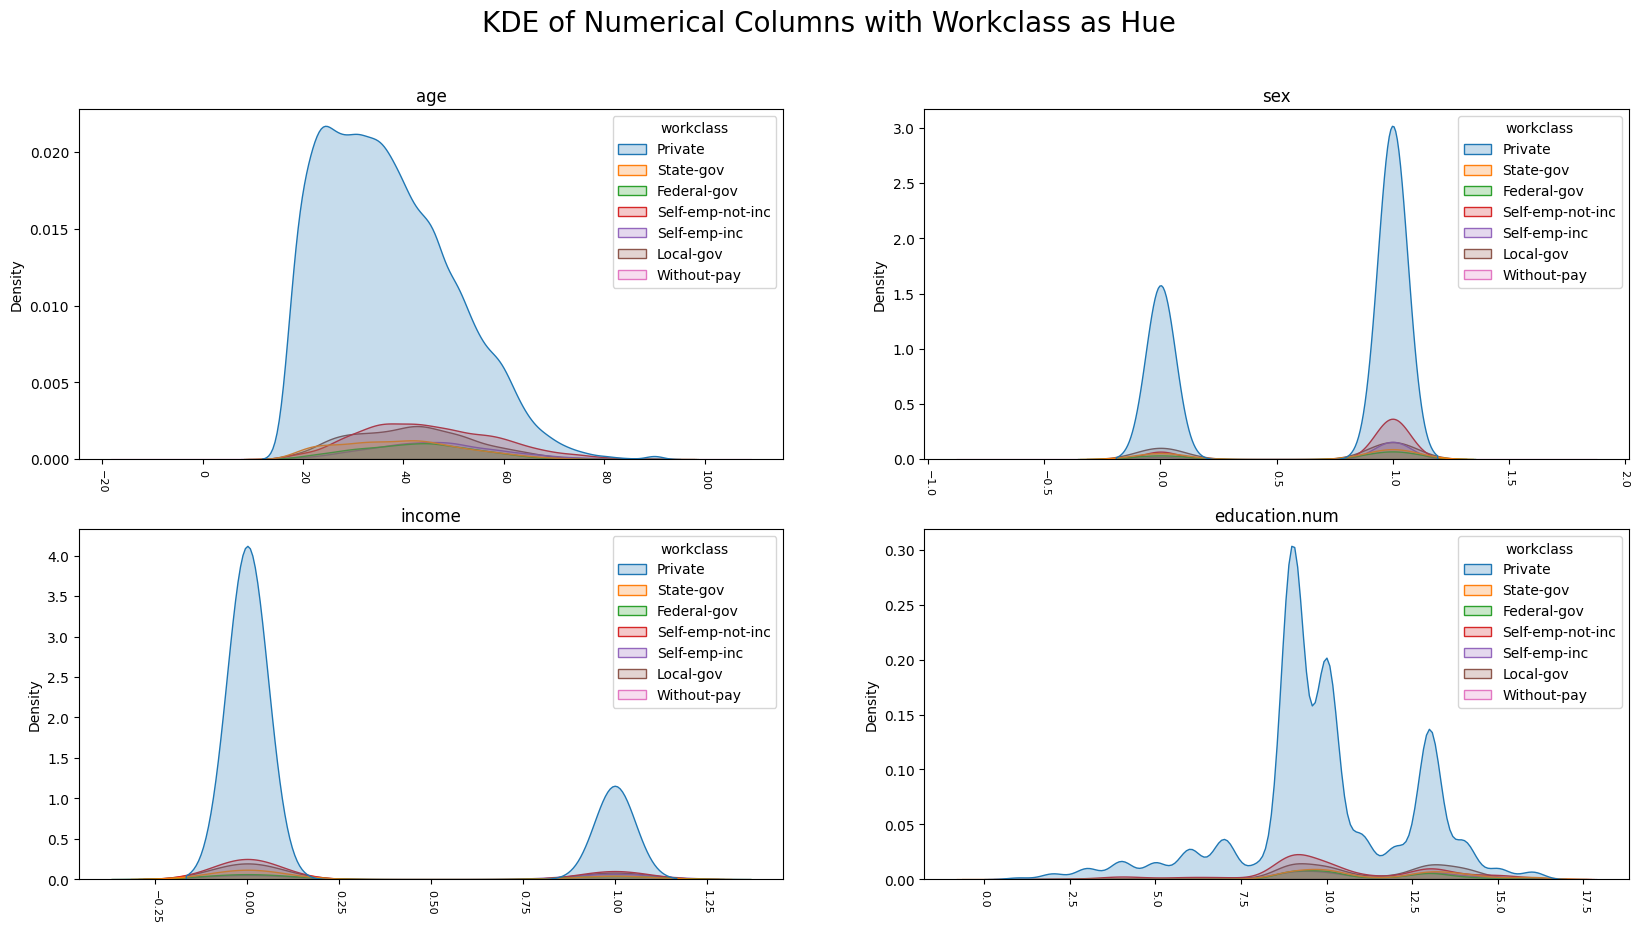

In [15]:
#Plot KDE of numerical columns with workclass as hue
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('KDE of Numerical Columns with Workclass as Hue', fontsize=20)
columns_to_plot = ['age', 'sex', 'income', 'education.num']
for i, col in enumerate(columns_to_plot):
    ax = axs[i // 2, i % 2]
    sns.kdeplot(data=df_ohe, x=col, hue=df['workclass'], ax=ax, fill=True, warn_singular=False)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Density')
    ax.xaxis.set_tick_params(rotation=270, labelsize=8)
plt.show()

*People who are in private class seem to be the majority amongst both high and low income groups. Most of private workclass people have education level around 8-10. More males work at private classes over females. Majority of private class people seem to be around the age of 30.*

```markdown
This Notebook shows certain analysis of the dataset. Similar analysis can be done between any pair of columns. ie. Between 2 numerical columns.
Categorical or Boolean columns can either be used as hue, or can be convered to numerical_columns using one-hot encoding. (0s and 1s)
Below shows such plots between pairs of columns
```

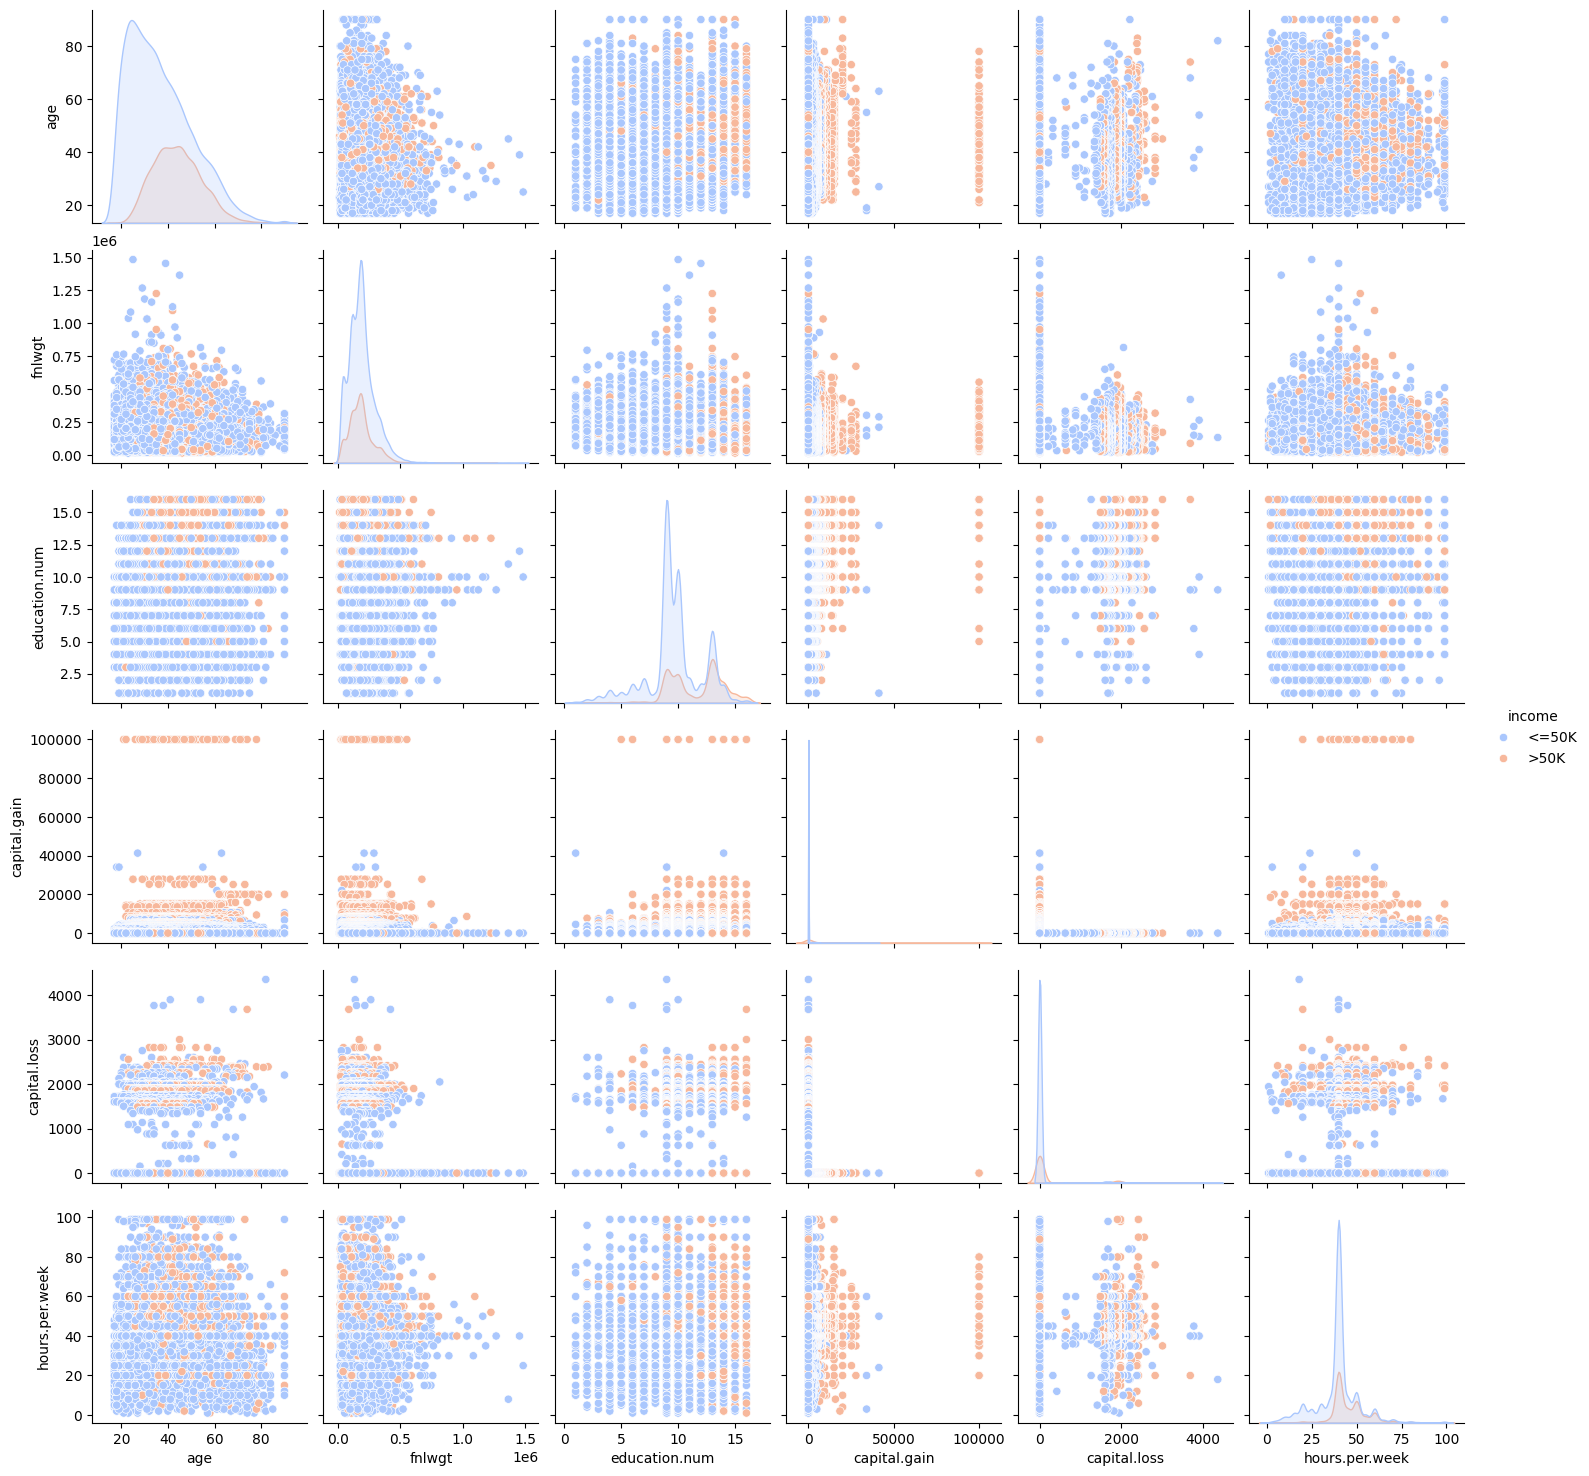

In [16]:
#pair plot of numerical columns
sns.pairplot(df.select_dtypes(include=['int']).join(df['income']), hue='income', diag_kind='kde', palette='coolwarm')
plt.show()

#diagonal plots are KDE plots of the numerical columns

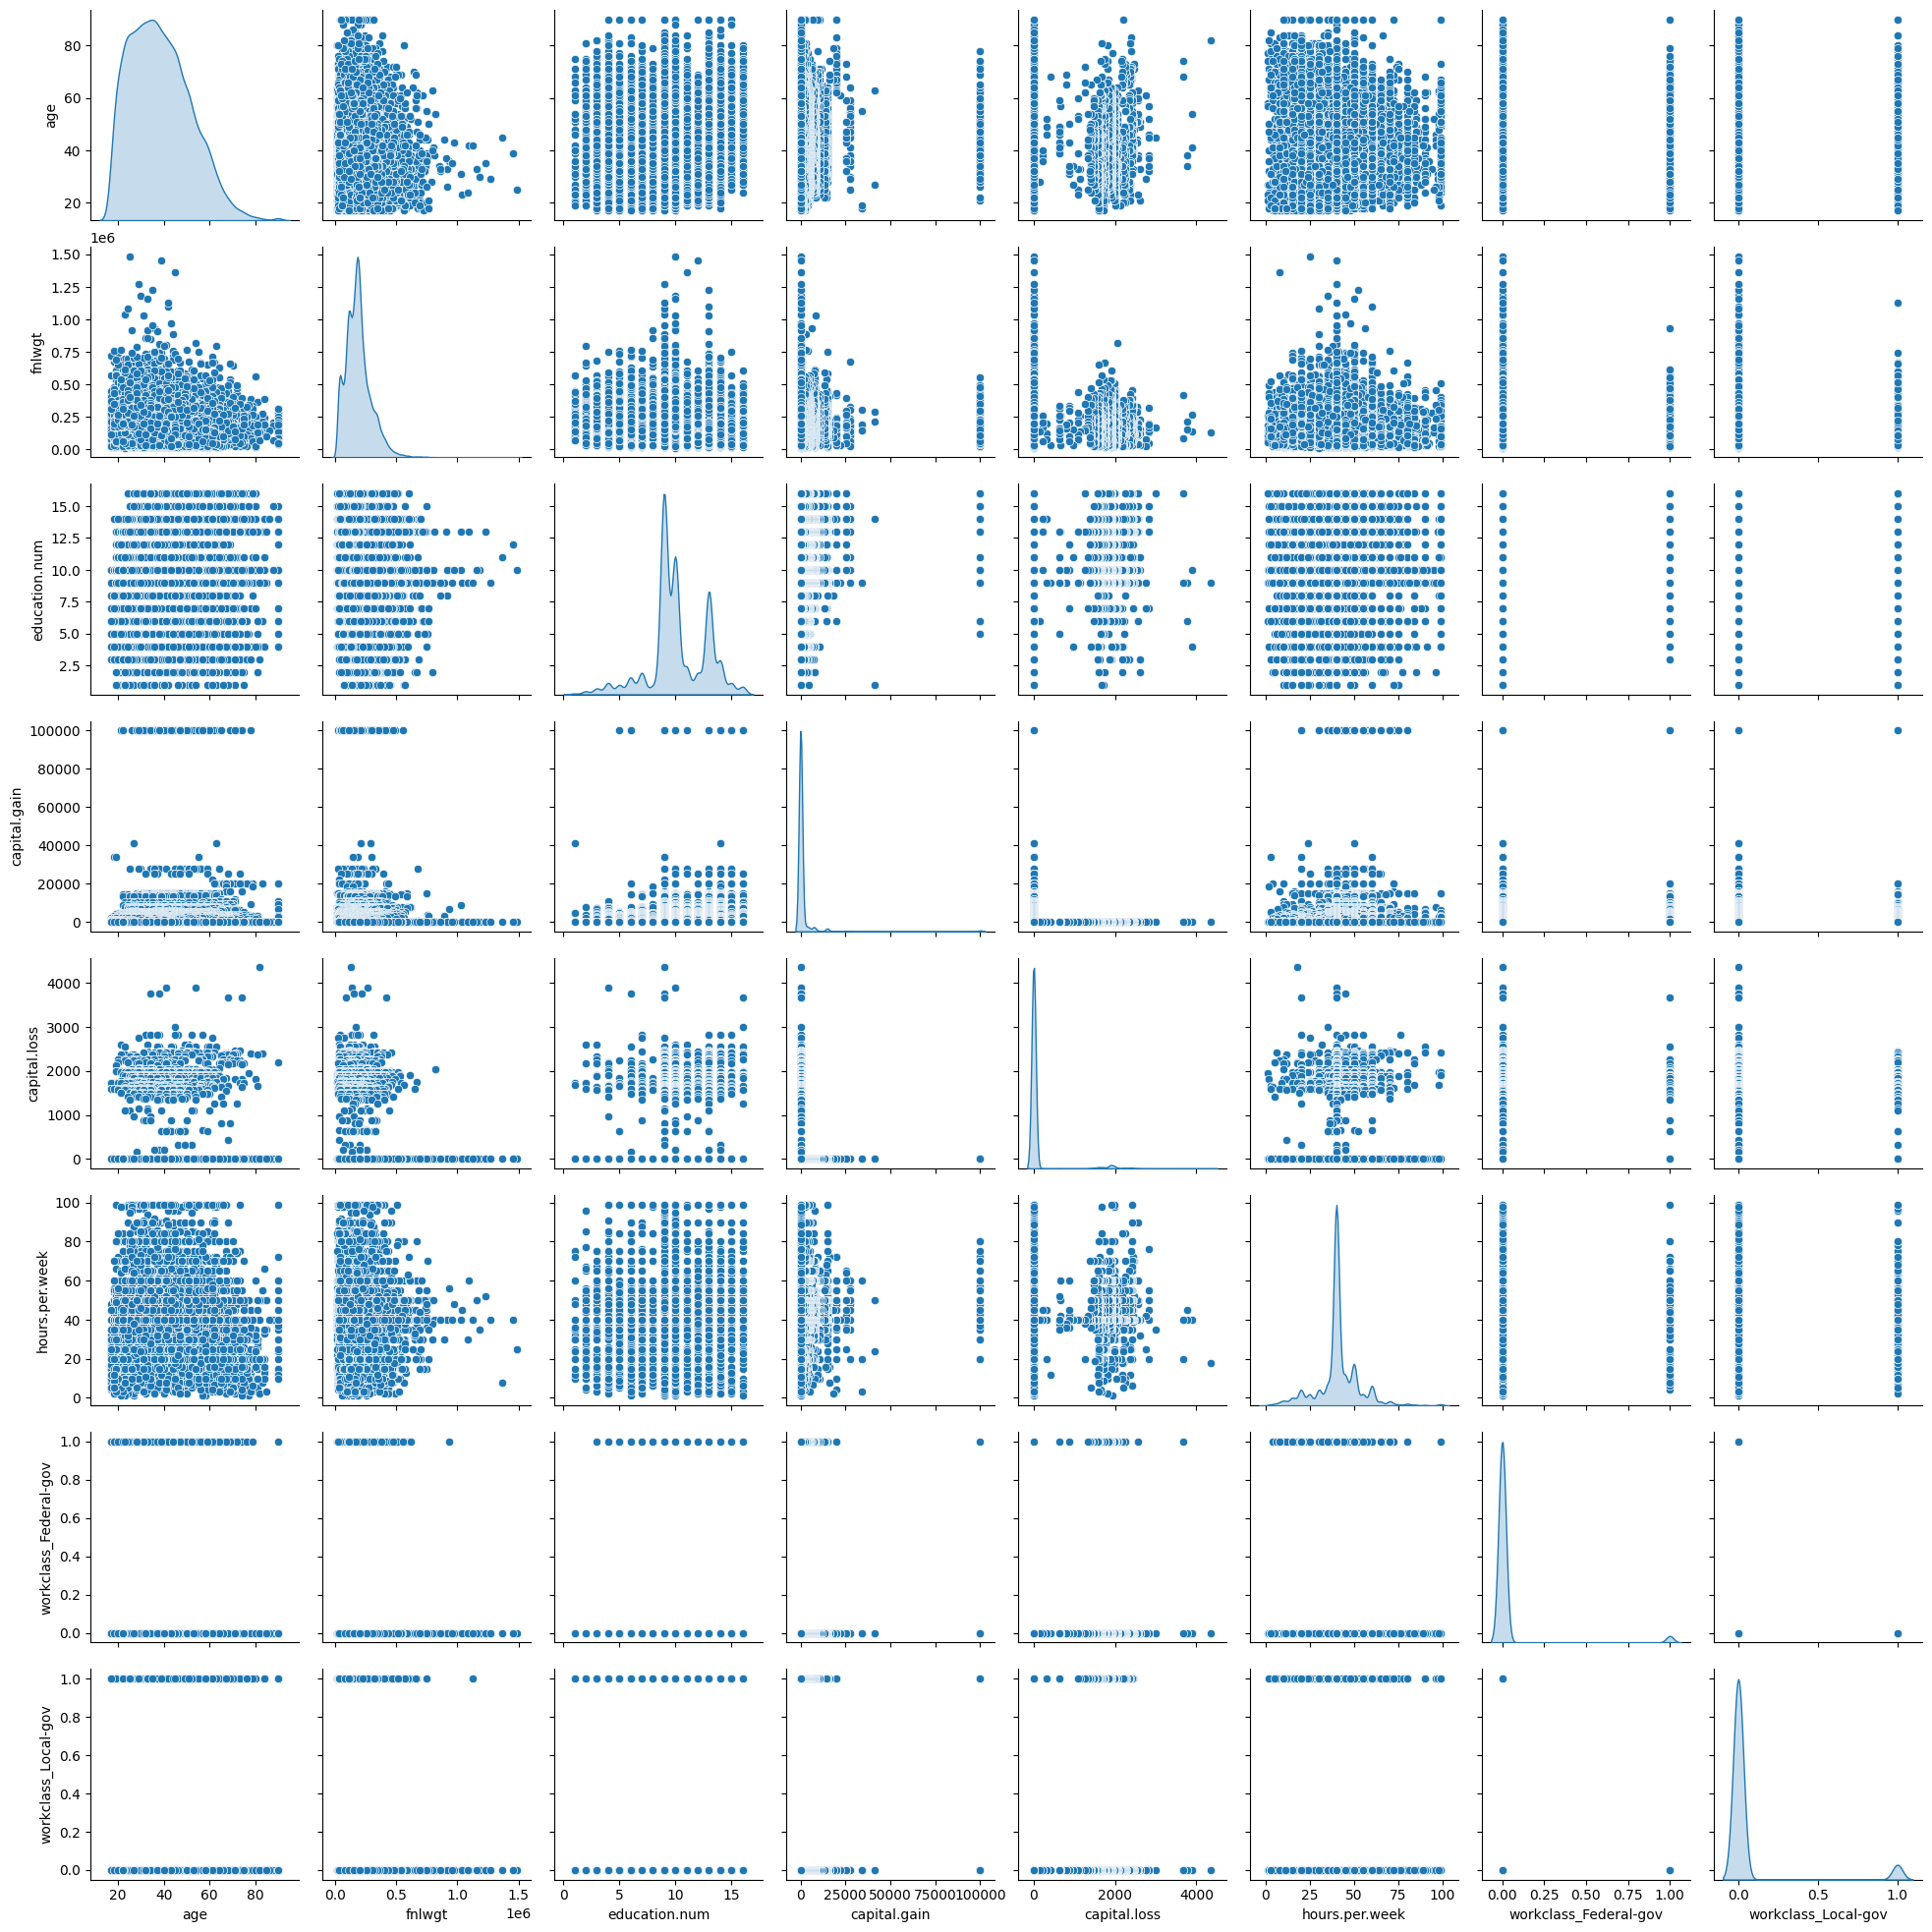

In [19]:
#pair plot of numerical columns , boolean columns, and all categorical columns 
df_ohe = pd.get_dummies(df, columns=df.select_dtypes(exclude=[np.number, bool]).columns)
for col in df_ohe.select_dtypes(include=[bool]).columns:
    df_ohe[col] = df_ohe[col].astype(int)

sns.pairplot(df_ohe.iloc[:, :8], diag_kind='kde')
plt.show()

#we are plotting only the first 8 columns as computing even the pair plot for all columns will take a lot of time 

```markdown
# Conclusion

This notebook provides a comprehensive analysis of the Adult Income dataset, exploring various aspects of the data through cleaning, encoding, and visualization. Below are the major conclusions and observations derived from the analysis:

1. **Demographics and Income**:
    - Older individuals tend to have a higher probability of earning more than $50K.
    - Males are more likely to earn higher incomes compared to females.
    - Higher education levels (e.g., Bachelor's, Master's, Doctorate) are strongly correlated with higher income levels.

2. **Work and Education**:
    - Individuals in private jobs form the majority of both high and low-income groups.
    - People with higher education levels tend to work in non-private sectors and are more likely to earn higher incomes.
    - Education levels between 8-10 (e.g., HS-Grad) are the most common among the population.

3. **Work Hours and Income**:
    - Individuals working around 40 hours per week are more likely to earn higher incomes.
    - There is a noticeable trend of males working more hours compared to females.

4. **Categorical Insights**:
    - The majority of individuals belong to the United States, with over 80% identifying as White.
    - Most individuals are employed in private jobs, with occupations being well-distributed across categories.

5. **Data Bias and Limitations**:
    - The dataset shows biases in gender, race, and workclass distributions, which may affect the generalizability of any models built using this data.
    - Certain columns, such as `fnlwgt` and `relationship`, appear ambiguous and may require further investigation or exclusion from analysis.

6. **Visualization Insights**:
    - Heatmaps and KDE plots reveal strong correlations between education, age, work hours, and income.
    - Pair plots provide a deeper understanding of relationships between numerical columns and categorical variables.

### General Statements:
- This analysis highlights the importance of data cleaning and preprocessing, such as handling missing values and one-hot encoding, to ensure meaningful insights.
- The visualizations provide a clear understanding of trends and relationships within the dataset, aiding in decision-making and hypothesis generation.
- Future work could involve building predictive models to classify income levels or exploring additional datasets to validate the findings.

This notebook serves as a foundation for further exploration and analysis of demographic and income-related data.
```